<a href="https://colab.research.google.com/github/shunnyK/AI/blob/main/diabetesDL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1102.3744 - mse: 1102.3744 - val_loss: 1073.2008 - val_mse: 1073.2008
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1029.4961 - mse: 1029.4961 - val_loss: 1028.9836 - val_mse: 1028.9836
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 983.8970 - mse: 983.8970 - val_loss: 970.5477 - val_mse: 970.5477
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 961.1919 - mse: 961.1919 - val_loss: 891.9340 - val_mse: 891.9340
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 835.6191 - mse: 835.6191 - val_loss: 791.8837 - val_mse: 791.8837
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 755.2845 - mse: 755.2845 - val_loss: 676.8210 - val_mse: 676.8210
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 627.9205 - mse: 627.9205 - val_loss: 552.2457 - val_mse: 552.2457
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 505.8856 - mse: 505.8856 - val_loss: 427.8348 - val_mse: 

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Test MAE : 5.341
Test RMSE: 7.654
Test R^2 : 0.176


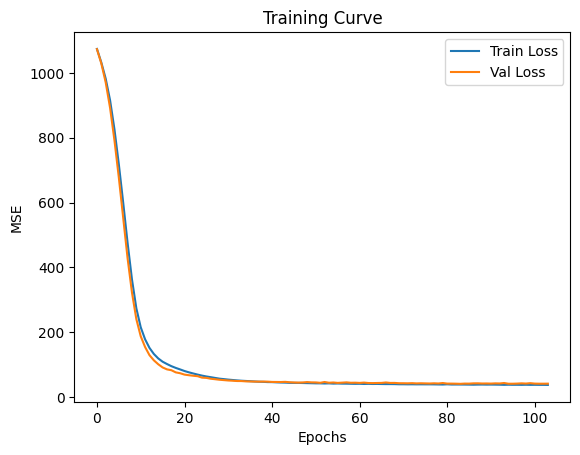

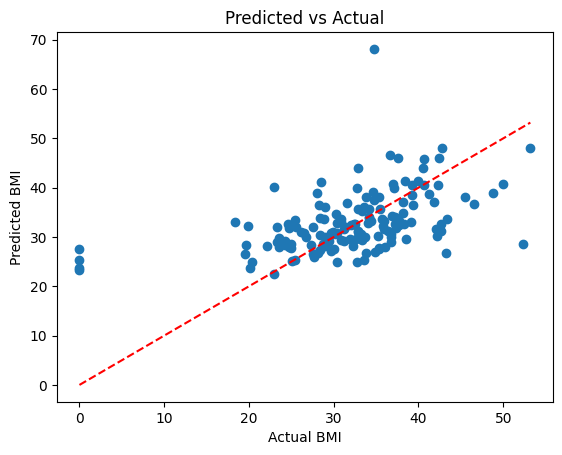

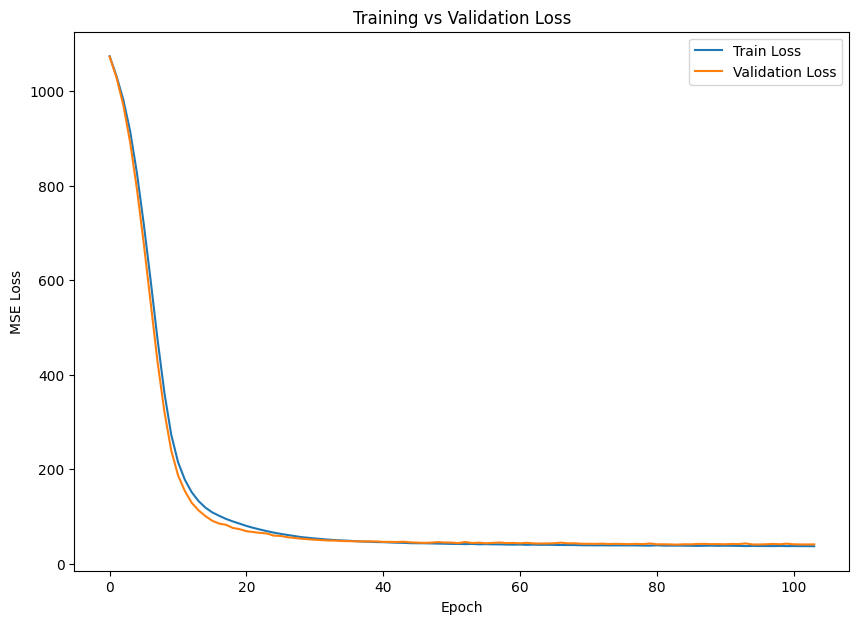

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv").dropna()
df = df.drop(columns=["Outcome"])   # Outcome 제거

X = df.drop(columns=["BMI"])
y = df["BMI"]

# -----------------------------
# 2) 데이터 분할 & 스케일링
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# -----------------------------
# 3) 모델 정의 (Keras Sequential)
# -----------------------------
model = Sequential()
model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))   # 회귀라서 activation 없음

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()

# -----------------------------
# 4) 학습 (조기 종료 옵션)
# -----------------------------
early_stop = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 5) 평가
# -----------------------------
y_pred = model.predict(X_test).ravel()

mse = mean_squared_error(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2   = r2_score(y_test, y_pred)


print(f"Test MAE : {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R^2 : {r2:.3f}")

# -----------------------------
# 6) 시각화
# -----------------------------
import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs"); plt.ylabel("MSE")
plt.legend(); plt.title("Training Curve"); plt.show()

# 예측 vs 실제
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual BMI"); plt.ylabel("Predicted BMI")
plt.title("Predicted vs Actual"); plt.show()


import matplotlib.pyplot as plt

# 총 학습된 epoch 수
n_epochs = len(history.history['loss'])

plt.figure(figsize=(10,7))
plt.plot(range(n_epochs), history.history['loss'], label='Train Loss')
plt.plot(range(n_epochs), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()